Project statement:
Client: One of the leading vehicle fuel pump manufacturers.
Business Problem:
Unplanned machine downtime has lead to loss in productivity.
Business Objective:
Minimize unplanned machine downtime.
Business Contraints:
Minimize Maintainance costs
Maximize equipment efficieny
Success Criteria:
Reduce the unplanned Downtime by atleast 10%
Achieve a cost saving of atleast $1M

IMPORTING LIBRARIES

In [33]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [36]:
import pandas as pd
import numpy as np

DATA UNDERSTANDING AND INSPECTION

LOAD AND PREVIEW THE DATASET MACHINE DOWNTIME.

In [37]:
df = pd.read_csv("Machine Downtime.csv")
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(Â°C),Spindle_Bearing_Temperature(Â°C),Spindle_Vibration(Âµm),Tool_Vibration(Âµm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


ESSENTIAL FEATURES OF DATASET: DATA TYPES OF COLUMNS, INFORMATION OF DATA FRAME.

In [38]:
df.dtypes

Date                                 object
Machine_ID                           object
Assembly_Line_No                     object
Hydraulic_Pressure(bar)             float64
Coolant_Pressure(bar)               float64
Air_System_Pressure(bar)            float64
Coolant_Temperature                 float64
Hydraulic_Oil_Temperature(Â°C)      float64
Spindle_Bearing_Temperature(Â°C)    float64
Spindle_Vibration(Âµm)              float64
Tool_Vibration(Âµm)                 float64
Spindle_Speed(RPM)                  float64
Voltage(volts)                      float64
Torque(Nm)                          float64
Cutting(kN)                         float64
Downtime                             object
dtype: object

In [39]:
df['Date'].dtypes

dtype('O')

DATA PREPROCESSING:
CONVERT DATE COLUMN (TYPE: 'O') TO DATE STRUCTURE

In [40]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [41]:
df['Year']= df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

AGAIN REVIEW DATATYPES AFTER COLUMN DATATYPE CONVERSIONS, WHEREVER DONE SO FAR.

In [42]:
df.dtypes

Date                                datetime64[ns]
Machine_ID                                  object
Assembly_Line_No                            object
Hydraulic_Pressure(bar)                    float64
Coolant_Pressure(bar)                      float64
Air_System_Pressure(bar)                   float64
Coolant_Temperature                        float64
Hydraulic_Oil_Temperature(Â°C)             float64
Spindle_Bearing_Temperature(Â°C)           float64
Spindle_Vibration(Âµm)                     float64
Tool_Vibration(Âµm)                        float64
Spindle_Speed(RPM)                         float64
Voltage(volts)                             float64
Torque(Nm)                                 float64
Cutting(kN)                                float64
Downtime                                    object
Year                                         int32
Month                                        int32
Day                                          int32
dtype: object

YOU CAN OBSERVE THAT DATE COLUMN IS NOW DATETIME64 DTYPE.

DATA PREPROCESSING:
CHECK FOR NULL VALUES BEFORE FURTHER ANALYSIS AND FILL THEM FIRST.

In [43]:
df.isnull().sum()

Date                                 0
Machine_ID                           0
Assembly_Line_No                     0
Hydraulic_Pressure(bar)             10
Coolant_Pressure(bar)               19
Air_System_Pressure(bar)            17
Coolant_Temperature                 12
Hydraulic_Oil_Temperature(Â°C)      16
Spindle_Bearing_Temperature(Â°C)     7
Spindle_Vibration(Âµm)              11
Tool_Vibration(Âµm)                 11
Spindle_Speed(RPM)                   6
Voltage(volts)                       6
Torque(Nm)                          21
Cutting(kN)                          7
Downtime                             0
Year                                 0
Month                                0
Day                                  0
dtype: int64

FILL NULL VALUES BY MEDIAN OF THE COLUMNS, INPLACE == TRUE.

In [44]:
columns = np.array(df.columns)
row, col = df.shape[0], df.shape[1]
for i in range(col):
    if df[columns[i]].dtypes == 'int64' or df[columns[i]].dtypes == 'float64':
         if df[columns[i]].isnull().sum()!=0:
              n = np.median(df[df[columns[i]].isnull()==False][columns[i]])
              df[columns[i]].fillna(n,inplace=True)
df.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)             0
Coolant_Pressure(bar)               0
Air_System_Pressure(bar)            0
Coolant_Temperature                 0
Hydraulic_Oil_Temperature(Â°C)      0
Spindle_Bearing_Temperature(Â°C)    0
Spindle_Vibration(Âµm)              0
Tool_Vibration(Âµm)                 0
Spindle_Speed(RPM)                  0
Voltage(volts)                      0
Torque(Nm)                          0
Cutting(kN)                         0
Downtime                            0
Year                                0
Month                               0
Day                                 0
dtype: int64

In [45]:
c = [c for c in df.columns if df[c].dtypes not in ['object','datetime64[ns]']]

In [46]:
np.array(c).reshape(-1,1)

array([['Hydraulic_Pressure(bar)'],
       ['Coolant_Pressure(bar)'],
       ['Air_System_Pressure(bar)'],
       ['Coolant_Temperature'],
       ['Hydraulic_Oil_Temperature(Â°C)'],
       ['Spindle_Bearing_Temperature(Â°C)'],
       ['Spindle_Vibration(Âµm)'],
       ['Tool_Vibration(Âµm)'],
       ['Spindle_Speed(RPM)'],
       ['Voltage(volts)'],
       ['Torque(Nm)'],
       ['Cutting(kN)'],
       ['Year'],
       ['Month'],
       ['Day']], dtype='<U32')

EXPLORATORY DATA ANALYSIS:
DISTRIBUTION AND RELATIONSHIP BETWEEN VARIABLES USING HEATMAP

In [73]:
D = df.select_dtypes(exclude=['object','datetime64[ns]'])

In [75]:
D.head()

,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(Â°C),Spindle_Bearing_Temperature(Â°C),Spindle_Vibration(Âµm),Tool_Vibration(Âµm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Year,Month,Day
0,0,0,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,2021,12,31
1,0,0,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,2021,12,31
2,2,2,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,2021,12,31
3,1,1,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,2022,5,31
4,0,0,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,2022,3,31


In [76]:
df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(Â°C),Spindle_Bearing_Temperature(Â°C),Spindle_Vibration(Âµm),Tool_Vibration(Âµm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime,Year,Month,Day
0,2021-12-31,0,0,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure,2021,12,31
1,2021-12-31,0,0,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure,2021,12,31
2,2021-12-31,2,2,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure,2021,12,31
3,2022-05-31,1,1,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure,2022,5,31
4,2022-03-31,0,0,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure,2022,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2022-02-01,0,0,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure,2022,2,1
2496,2022-02-01,0,0,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure,2022,2,1
2497,2022-02-01,1,1,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,2.78,No_Machine_Failure,2022,2,1
2498,2022-02-01,2,2,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure,2022,2,1


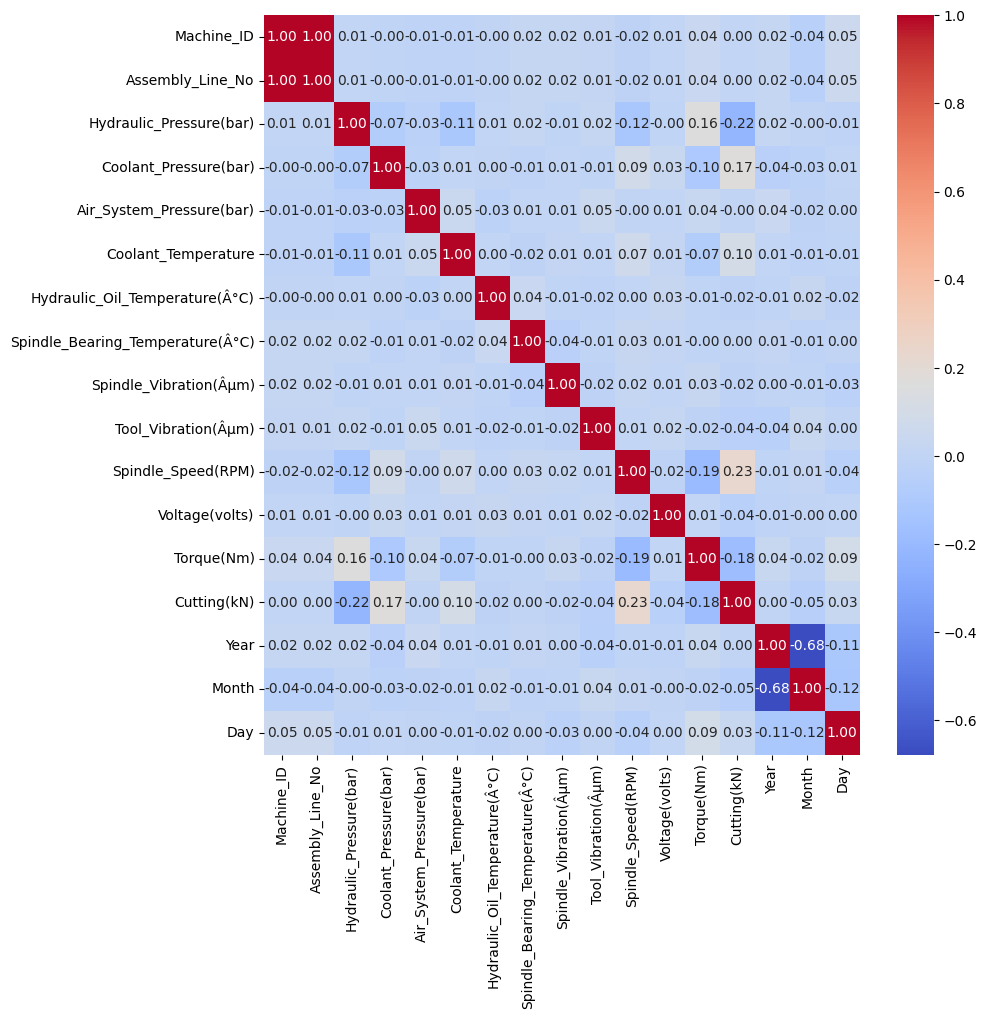

In [77]:
plt.figure(figsize=(9.6,9.6))
sns.heatmap(D.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

DATASET HAS NO NULL VALUES NOW, CONTINUE.

In [78]:
le_machine = LabelEncoder()
df['Machine_ID'] = le_machine.fit_transform(df['Machine_ID'])

le_line = LabelEncoder()
df['Assembly_Line_No'] = le_line.fit_transform(df['Assembly_Line_No'])

In [83]:
df.head(25)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(Â°C),Spindle_Bearing_Temperature(Â°C),Spindle_Vibration(Âµm),Tool_Vibration(Âµm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime,Year,Month,Day
0,2021-12-31,0,0,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,1,2021,12,31
1,2021-12-31,0,0,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,1,2021,12,31
2,2021-12-31,2,2,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,1,2021,12,31
3,2022-05-31,1,1,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,1,2022,5,31
4,2022-03-31,0,0,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,1,2022,3,31
5,2022-03-31,1,1,137.370000,5.918357,7.228066,5.4,48.0,32.7,0.903,25.597,27613.0,319.0,25.521330,3.55,1,2022,3,31
6,2022-03-31,0,0,135.930000,6.560332,6.710999,19.3,48.8,37.4,1.240,32.138,26605.0,438.0,25.454652,3.58,1,2022,3,31
7,2022-03-31,2,2,127.715164,5.060709,6.002229,20.8,45.8,37.5,1.125,19.823,14266.0,334.0,34.973004,2.02,0,2022,3,31
8,2022-03-31,2,2,123.618456,5.074380,6.039524,4.5,51.5,32.1,0.690,16.972,20413.0,278.0,32.519299,2.88,0,2022,3,31
9,2022-03-31,2,2,134.020000,5.567857,6.733096,14.0,47.9,35.2,0.748,36.601,20504.0,379.0,25.618567,3.93,1,2022,3,31


In [80]:
le_downtime = LabelEncoder()
df['Downtime'] = df['Downtime'].apply(lambda x:1 if x == 'Machine_Failure' else 0)

In [84]:
df.head(30)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(Â°C),Spindle_Bearing_Temperature(Â°C),Spindle_Vibration(Âµm),Tool_Vibration(Âµm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime,Year,Month,Day
0,2021-12-31,0,0,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,1,2021,12,31
1,2021-12-31,0,0,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,1,2021,12,31
2,2021-12-31,2,2,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,1,2021,12,31
3,2022-05-31,1,1,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,1,2022,5,31
4,2022-03-31,0,0,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,1,2022,3,31
5,2022-03-31,1,1,137.370000,5.918357,7.228066,5.4,48.0,32.7,0.903,25.597,27613.0,319.0,25.521330,3.55,1,2022,3,31
6,2022-03-31,0,0,135.930000,6.560332,6.710999,19.3,48.8,37.4,1.240,32.138,26605.0,438.0,25.454652,3.58,1,2022,3,31
7,2022-03-31,2,2,127.715164,5.060709,6.002229,20.8,45.8,37.5,1.125,19.823,14266.0,334.0,34.973004,2.02,0,2022,3,31
8,2022-03-31,2,2,123.618456,5.074380,6.039524,4.5,51.5,32.1,0.690,16.972,20413.0,278.0,32.519299,2.88,0,2022,3,31
9,2022-03-31,2,2,134.020000,5.567857,6.733096,14.0,47.9,35.2,0.748,36.601,20504.0,379.0,25.618567,3.93,1,2022,3,31


In [85]:
# Defining features and target variable
features = df.drop(columns=['Date', 'Downtime'])
target = df['Downtime']

In [86]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [87]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
# Model Development: RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
# Model Prediction
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [91]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [92]:
accuracy

0.988

In [93]:
conf_matrix

array([[266,   3],
       [  3, 228]], dtype=int64)

In [94]:
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       269
           1       0.99      0.99      0.99       231

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



In [95]:
roc_auc

0.9993160495019231

DATA ANALYSIS: ANALYZING DOWNTIME EVENTS TO UNDERSTAND PATTERNS AND CAUSES

In [96]:
df.Downtime.unique()

array([1, 0], dtype=int64)

In [97]:
df["Downtime"].value_counts()

Downtime
1    1265
0    1235
Name: count, dtype: int64

<Axes: xlabel='Downtime', ylabel='count'>

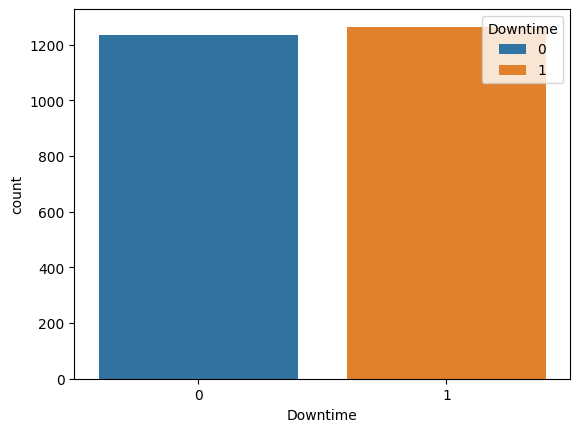

In [98]:
sns.countplot(x="Downtime",hue="Downtime",data=df)

In [102]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(Â°C)',
       'Spindle_Bearing_Temperature(Â°C)', 'Spindle_Vibration(Âµm)',
       'Tool_Vibration(Âµm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime', 'Year', 'Month', 'Day'],
      dtype='object')

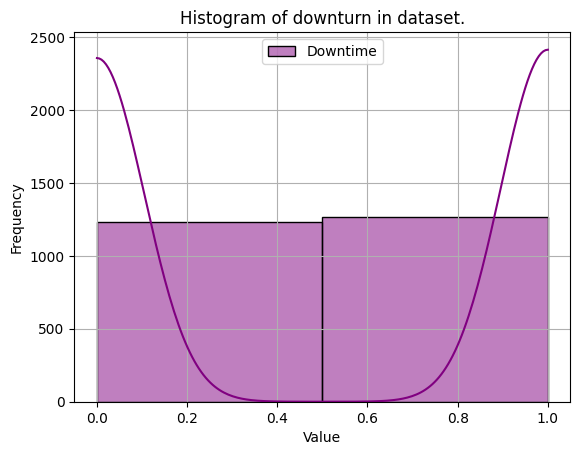

In [133]:
sns.histplot(df['Downtime'],kde=True,bins=2,color='purple',label='Downtime',edgecolor='black')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of downturn in dataset.")
plt.grid()
plt.legend()
plt.show()

In [110]:
df[['Downtime','Coolant_Temperature']].corr()

,Downtime,Coolant_Temperature
Downtime,1.000000,0.167275
Coolant_Temperature,0.167275,1.000000


In [107]:
pd.crosstab(df['Downtime'],df['Coolant_Temperature'])

Coolant_Temperature,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,...,34.3,34.7,34.9,35.3,35.5,35.6,36.0,36.1,36.5,98.2
Downtime,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,62,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
1,6,5,2,3,6,2,1,2,7,6,...,1,1,0,1,1,1,0,0,3,0
